# US Baby Name

## GIỚI THIỆU
Dữ Liệu `US_BaBy_Names.csv` chứa thông tin của các em bé sinh từ 2004 - 2014 tại Mỹ. Dựa vào tập dữ liệu trên, bạn hãy thực hiện các bài tập sau:

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

## TÌM HIỂU DỮ LIỆU

### 01. Đọc dữ liệu

In [6]:
import pandas as pd
data = pd.read_csv(r'/content/drive/MyDrive/TKMT_T7_7-9/US_Baby_Names.csv')

### 02. Hiển thị 10 dòng dữ liệu bất kỳ

In [ ]:
data.sample(10 ,random_state = 99)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
394,11743,11744,Isis,2005,F,AK,5
383632,2062747,2062748,Allen,2011,M,KY,13
208453,1076538,1076539,Zenaida,2014,F,FL,6
155915,805960,805961,Gilbert,2010,M,CO,9
139582,754819,754820,Eileen,2004,F,CO,10
491091,2696632,2696633,Summer,2014,F,MN,28
579862,3262886,3262887,Zoey,2007,F,NE,27
104977,563040,563041,Estefani,2014,F,CA,17
263318,1326546,1326547,Khari,2014,M,GA,7
511281,2815004,2815005,Abrielle,2013,F,MO,8


### 03. Cho biết kích thước dữ liệu

In [ ]:
data.shape

(1016395, 7)

### 04. Xóa 2 cột 'Unnamed: 0' and 'Id'

In [27]:
data.drop(["Unnamed: 0" , "Id"],  axis=1, inplace=True)
print(data.sample(5))

             Name  Year Gender State  Count
350721      Oscar  2010      M    IN     35
343729  Brooklynn  2014      F    IN     74
59334      Samuel  2012      M    AZ    244
400771  Jefferson  2008      M    LA      5
375477       June  2010      F    KY      5


### 05. Cho biết số lượng bé trai, bé gái?

In [ ]:
data.groupby(["Gender"]).size()

Gender
F    558846
M    457549
dtype: int64

### 06. Trong bộ dữ liệu có bao nhiêu tên khác nhau?

In [28]:
# số lượng xuất hiện -> groupby(), khác nhau-> value_counts()
print(data['Name'].unique().size)
print(data['Name'].value_counts().size)

17632
17632


### 07. Tên nào xuất hiện ít nhất?

In [39]:
# data['Name'].value_counts().idxmin()
x = data['Name'].value_counts()
xList = x[x == x.min()].index.tolist()
print(xList)

['Grettell', 'Dawsen', 'Abenezer', 'Greenley', 'Daiden', 'Jenisha', 'Eleah', 'Roze', 'Koran', 'Shriyans', 'Emilyann', 'Reygan', 'Dusti', 'Jamyron', 'Codie', 'Akiyah', 'Orchid', 'Natnael', 'Elisse', 'Stassi', 'Man', 'Tenleigh', 'Jadarion', 'Ellayna', 'Rutledge', 'Tynleigh', 'Davanee', 'Emmalynne', 'Evalee', 'Gloriana', 'Temiloluwa', 'Yalexi', 'Deyanara', 'Krissy', 'Blakley', 'Evaleigh', 'Corley', 'Heyward', 'Wicahpi', 'Loralye', 'Keerthi', 'Quinlyn', 'Diogenes', 'Antonios', 'Imogene', 'Sarahgrace', 'Munachiso', 'Kynzlie', 'Kodiak', 'Jonanthony', 'Leanah', 'Liliah', 'Montzerrat', 'Lochlyn', 'Harbor', 'Iraida', 'Luisana', 'Misk', 'Jeremey', 'Mirakle', 'Makenlie', 'Meelah', 'Avyn', 'Arienne', 'Tycen', 'Talus', 'Kaydie', 'Calee', 'Collyns', 'Mariaemilia', 'Vung', 'Lakely', 'Aizlynn', 'Kolette', 'Zayley', 'Zniyah', 'Jenisis', 'Nakyla', 'Ashraf', 'Novaleigh', 'Jleigh', 'Mato', 'Julee', 'Fallou', 'Juliya', 'Keosha', 'Nona', 'Jaryn', 'Kensli', 'Zerenity', 'Alla', 'Adalae', 'Devyne', 'Navey', 'A

### 08. Top 10 tên được sử dụng nhiều nhất?

In [49]:
x = data['Year'].value_counts()
print(x.tail(10))

2009    94609
2007    94332
2014    94148
2010    93307
2012    93024
2013    92743
2011    92545
2006    91803
2005    88494
2004    86420
Name: Year, dtype: int64


## TRỰC QUAN DỮ LIỆU

### 09. Vẽ đồ thị top 10 tên xuất hiện nhiều nhất năm 2014

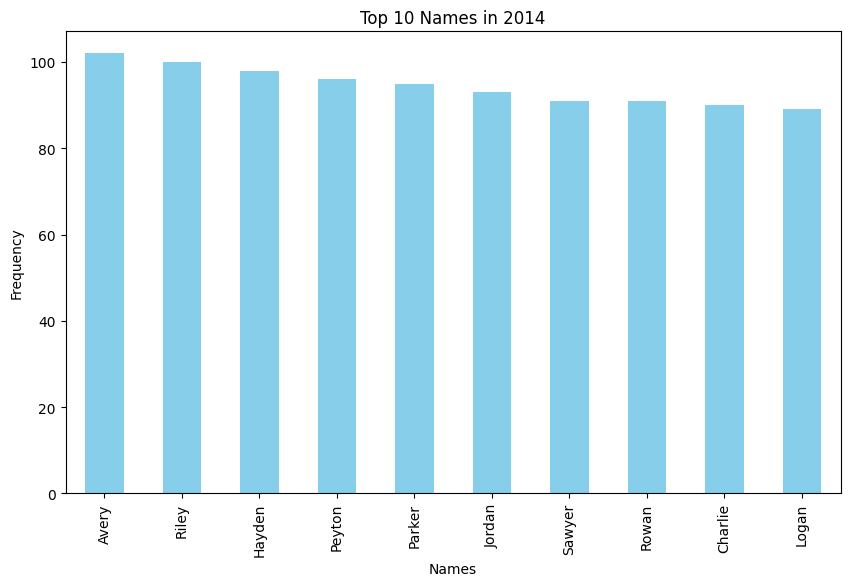

In [73]:
import matplotlib.pyplot as plt
x_2014 = data[data['Year'] == 2014]

x = x_2014['Name'].value_counts()
# print(x)

plt.figure(figsize=(10, 6))
top10.plot(kind='bar', color='skyblue')
plt.title('Top 10 Names in 2014')
plt.xlabel('Names')
plt.ylabel('Frequency')
plt.show()

### 10. Vẽ đồ thị thể hiện tỷ lệ nam nữ qua các năm 2004-2014

<Figure size 1000x600 with 0 Axes>

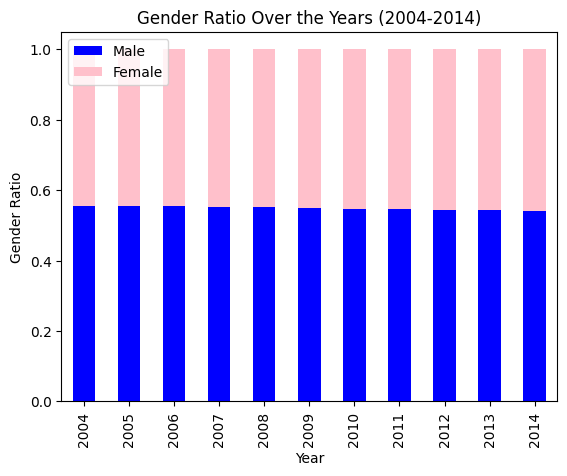

In [71]:
import matplotlib.pyplot as plt
nam = data[data['Gender'] == 'F']
nu = data[data['Gender'] == 'M']

# ĐẾM số lượng nam và nữ theo từng năm -> group
gender_counts = data.groupby(['Year', 'Gender']).size().unstack()

# Tính tỷ lệ nam và nữ
gender_ratio = gender_counts.div(gender_counts.sum(axis=1), axis=0)

# Vẽ đồ thị
plt.figure(figsize=(10, 6))
gender_ratio.plot(kind='bar', stacked=True, color=['blue', 'pink'])
plt.title('Gender Ratio Over the Years (2004-2014)')
plt.xlabel('Year')
plt.ylabel('Gender Ratio')
plt.legend(['Male', 'Female'], loc='upper left')
plt.show()

